In [39]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, cohen_kappa_score, accuracy_score, roc_auc_score
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import numpy as np
import xgboost as xgb



%matplotlib inline

In [21]:
df = pd.read_feather(r'AMCRED\BLUSOL\BLUSOL\big_frame_4.feather')

In [22]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('DEFAULT',axis = 1).values,df['DEFAULT'].values,test_size = 0.25)

In [6]:

# Define the XGBoost classifier and the parameter grid for GridSearchCV
classifier = xgb.XGBClassifier()
parameters = {
    'learning_rate': [0.01,0.03],
    'max_depth': [5, 6],
    'min_child_weight': [4],
    'n_estimators': [1000,1100, 1200],
    'scale_pos_weight':list(range(20,60,10)),
    "colsample_bytree":[0.75,0.5,1],
    "gamma":[0.001,0.01,0.2]}

# Create an instance of GridSearchCV with the classifier and parameter grid
gridsearch = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='roc_auc', cv=5)

# Fit the GridSearchCV instance to the training data
grid=gridsearch.fit(x_train, y_train)

In [7]:
# Find the best parameters and the best score
best_params = grid.best_params_
best_score = grid.best_score_
print(best_score)
print(best_params)

0.9396702048369964
{'colsample_bytree': 0.5, 'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 1100, 'scale_pos_weight': 20}


In [9]:
final=classifier.fit(x_train, y_train)
y_pred = final.predict(x_test)

<AxesSubplot: >

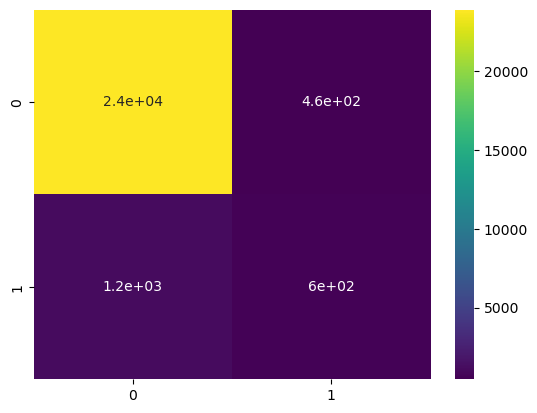

In [10]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.95      0.98      0.97     24340
        True       0.57      0.34      0.42      1781

    accuracy                           0.94     26121
   macro avg       0.76      0.66      0.69     26121
weighted avg       0.93      0.94      0.93     26121



In [12]:


roc_auc = roc_auc_score(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)
print("ROC AUC: ", roc_auc)
print("Cohen's Kappa: ", cohen_kappa)


Best Parameters:  {'colsample_bytree': 0.5, 'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 1100, 'scale_pos_weight': 20}
Best Score:  0.9396702048369964
ROC AUC:  0.6587966562044256
Cohen's Kappa:  0.39156086625655073


x,y = df.drop('DEFAULT',axis = 1).values,df['DEFAULT'].values
cv = KFold(n_splits = 5)
params = {'max_depth': [5,6,7,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7],
         'scale_pos_weight':list(range(30,60,10))}

#Scores Kapp e AUC
kappa_scorer = make_scorer(cohen_kappa_score)
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

scoring_metrics = {'kappa': kappa_scorer, 'auc': auc_scorer}
                           
model = xgb.XGBClassifier()
grid = GridSearchCV(estimator = model, param_grid = params, cv = cv, scoring=scoring_metrics,verbose = 1, refit="auc")
grid_result = grid.fit(x,y)

def metric(real,pred):
    return np.where(pred[real == 1] < 1,np.power(pred[real == 1],2),1).sum() * 100 + np.where(pred[real == 0] > 0,np.power(1 - pred[real == 0],2),1).sum()

scorer = make_scorer(metric)

clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=3,cv = cv)

In [42]:
final.save_model("modelo_xgb_V1.txt")

In [14]:
# Define the XGBoost classifier and the parameter grid for GridSearchCV
classifier = xgb.XGBClassifier()
parameters = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [4, 5, 6, 7],
    'n_estimators': [100, 500, 1000],
    'min_child_weight': [3, 4, 5],
    'scale_pos_weight':list(range(20,60,10))}

# Create an instance of GridSearchCV with the classifier and parameter grid
kappa_scorer = make_scorer(cohen_kappa_score)
gridsearch = GridSearchCV(estimator=classifier, param_grid=parameters, scoring=kappa_scorer, cv=5)

# Fit the GridSearchCV instance to the training data
grid=gridsearch.fit(x_train, y_train)

In [15]:
# Find the best parameters and the best score
best_params = grid.best_params_
best_score = grid.best_score_
print(best_score)
print(best_params)

0.45220489305927386
{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'scale_pos_weight': 30}


In [16]:
final1=classifier.fit(x_train, y_train)
y_pred = final.predict(x_test)

<AxesSubplot: >

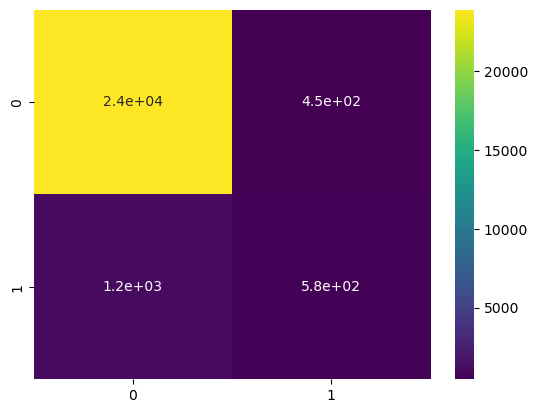

In [17]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.95      0.98      0.97     24365
        True       0.56      0.33      0.42      1756

    accuracy                           0.94     26121
   macro avg       0.76      0.66      0.69     26121
weighted avg       0.93      0.94      0.93     26121



In [19]:
roc_auc = roc_auc_score(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)
print("ROC AUC: ", roc_auc)
print("Cohen's Kappa: ", cohen_kappa)


Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'scale_pos_weight': 30}
Best Score:  0.45220489305927386
ROC AUC:  0.6570524581780411
Cohen's Kappa:  0.38815020877252115


### Rede Neural Classifier

In [23]:

df.head()

,situacaodoimovelderesidencia,nropessoasnacasa,situacaoimoveldeatividade,tipodeponto,formacaoescolar,constituicao,pessoafisicajuridica,nrodefuncionarios,rendafamiliarmensal,totaldasreceitas,finalidadeemprestimo,taxaaomes,valoremprestado,quantidadeparcelas,conceitospc,valorparcela,pesoparcela,DEFAULT
0,-0.642253,0.313479,0.030079,-0.629161,-0.031697,0.360688,1.890953,-0.058765,-0.004641,-0.013619,-0.775184,0.425537,-0.736380,-0.578737,3.065097,-0.353105,-0.454706,False
1,-0.642253,-0.078087,0.030079,1.589402,0.057219,0.360688,1.890953,-0.058765,-0.001092,-0.011746,-0.775184,0.425537,-0.063955,1.164573,-0.478508,-0.224240,-0.349945,False
2,2.087291,-0.078087,2.838781,1.589402,-0.031697,0.360688,1.890953,0.482467,-0.012919,0.033630,-0.775184,-0.360870,0.968164,1.164573,-0.478508,0.098897,-0.549765,False
3,-0.642253,0.705045,0.030079,1.589402,0.057219,-0.560714,0.098972,-0.058765,-0.001092,-0.001411,1.417033,-0.630729,-0.491908,-0.827781,-0.478508,-0.120299,-0.398116,False
4,-0.642253,-0.078087,-0.540502,-0.629161,-0.031697,-1.488522,-0.597817,0.121645,-0.001092,-0.004318,-0.775184,-0.630729,-0.572463,-0.827781,-0.478508,-0.184078,-0.391048,False


In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Function to generate Deep ANN model 
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
 

In [25]:
print(x_train.shape)

(78361, 17)


In [26]:
y_train.astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
# Separate Target Variable and Predictor Variables
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer,both are same!
# relu means Rectifier linear unit function
# Creating the classifier ANN model
classifier.add(Dense(units=19, input_dim=17, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=14, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=13, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=12, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=10, kernel_initializer='uniform', activation='softmax'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=[ "accuracy"])
# fitting the Neural Network on the training data
classifier.fit(x_train,y_train.astype(int), batch_size=100 , epochs=20, verbose=1)
 

Epoch 1/20
784/784 [==============================] - 2s 2ms/step - loss: 0.2141 - accuracy: 0.9333
Epoch 2/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1424 - accuracy: 0.9333
Epoch 3/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1415 - accuracy: 0.9333
Epoch 4/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1409 - accuracy: 0.9333
Epoch 5/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1407 - accuracy: 0.9344
Epoch 6/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1403 - accuracy: 0.9369
Epoch 7/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1401 - accuracy: 0.9380
Epoch 8/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1396 - accuracy: 0.9383
Epoch 9/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1396 - accuracy: 0.9389
Epoch 10/20
784/784 [==============================] - 1s 1ms/step - loss: 0.1393 - accuracy: 0.9393

In [55]:
# equivalent to: model.save("model.h5")
from keras.models import save_model
save_model(classifier, "model2.h5")

In [59]:
y_bin = y_train.astype(int)
# Defining a function for finding best hyperparameters
def FunctionFindBestParams(x_train, y_bin):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20, 25]
    epoch_list=[5, 10, 50 ,100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=19, input_dim=17, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=14, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=13, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=12, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=10, kernel_initializer='uniform', activation='softmax'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
            
            survivalANN_Model=classifier.fit(x_train,y_bin, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            # Fetching the accuracy of the training
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
###############################################
 
# Calling the function
ResultsData=FunctionFindBestParams(x_train, y_bin)



In [57]:
ResultsData

,TrialNumber,Parameters,Accuracy
0,1,batch_size5-epoch5,0.938247
0,2,batch_size5-epoch10,0.939217
0,3,batch_size5-epoch50,0.940838
0,4,batch_size5-epoch100,0.933321
0,5,batch_size10-epoch5,0.938490
0,6,batch_size10-epoch10,0.939064
0,7,batch_size10-epoch50,0.940978
0,8,batch_size10-epoch100,0.941986
0,9,batch_size15-epoch5,0.938796
0,10,batch_size15-epoch10,0.939128


  TrialNumber             Parameters  Accuracy
0          12  batch_size15-epoch100  0.942229


<AxesSubplot: xlabel='Parameters'>

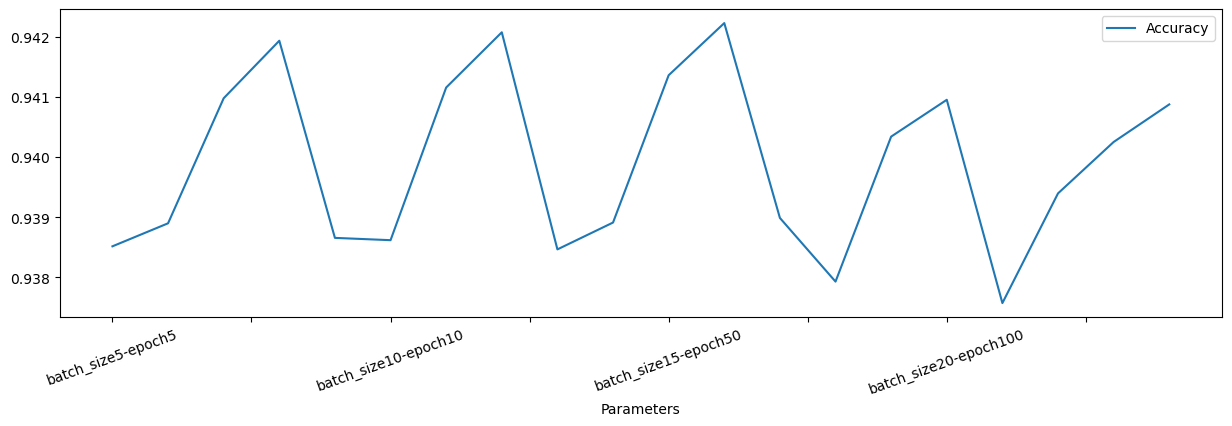

In [33]:

# Printing the best parameter
print(ResultsData.sort_values(by='Accuracy', ascending=False).head(1))
 

# Visualizing the results
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)

In [58]:

# Training the model with best hyperparamters
bb=classifier.fit(x_train,y_train, batch_size=20 , epochs=100, verbose=1)
bb

Epoch 1/100
3919/3919 [==============================] - 5s 1ms/step - loss: 0.1402 - accuracy: 0.9394
Epoch 2/100
3919/3919 [==============================] - 5s 1ms/step - loss: 0.1396 - accuracy: 0.9393
Epoch 3/100
3919/3919 [==============================] - 5s 1ms/step - loss: 0.1395 - accuracy: 0.9397
Epoch 4/100
3919/3919 [==============================] - 5s 1ms/step - loss: 0.1392 - accuracy: 0.9393
Epoch 5/100
3919/3919 [==============================] - 5s 1ms/step - loss: 0.1391 - accuracy: 0.9396
Epoch 6/100
3919/3919 [==============================] - 5s 1ms/step - loss: 0.1392 - accuracy: 0.9391
Epoch 7/100
3919/3919 [==============================] - 5s 1ms/step - loss: 0.1386 - accuracy: 0.9402
Epoch 8/100
3919/3919 [==============================] - 5s 1ms/step - loss: 0.1387 - accuracy: 0.9399
Epoch 9/100
3919/3919 [==============================] - 6s 1ms/step - loss: 0.1386 - accuracy: 0.9401
Epoch 10/100
3919/3919 [==============================] - 5s 1ms/step - l

In [52]:
# equivalent to: model.save("model.h5")
save_model(classifier, "model.h5")

In [53]:
# load model
model = load_model('model.h5')
# summarize model.
model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_295 (Dense)           (None, 19)                342       
                                                                 
 dense_296 (Dense)           (None, 14)                280       
                                                                 
 dense_297 (Dense)           (None, 13)                195       
                                                                 
 dense_298 (Dense)           (None, 12)                168       
                                                                 
 dense_299 (Dense)           (None, 6)                 78        
                                                                 
 dense_300 (Dense)           (None, 1)                 7         
                                                                 
Total params: 1,070
Trainable params: 1,070
Non-train

In [54]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 93.75%


In [19]:

# Predictions on testing data
Predictions=model.predict(x_test)
 
 


817/817 [==============================] - 1s 673us/step


NameError: name 'PredictorScalerFit' is not defined

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Survival']=y_test
TestingData['PredictedSurvivalProb']=Predictions
 
# Defining the probability threshold
def probThreshold(inpProb):
    if inpProb  >  0.5:
        return(1)
    else:
        return(0)
 
# Generating predictions on the testing data by applying probability threshold
TestingData['PredictedSurvival']=TestingData['PredictedSurvivalProb'].apply(probThreshold)
print(TestingData.head())

from sklearn import metrics
print('\n######### Testing Accuracy Results #########')
print(metrics.classification_report(TestingData['Survival'], TestingData['PredictedSurvival']))
print(metrics.confusion_matrix(TestingData['Survival'], TestingData['PredictedSurvival']))